# Pazy wing static twisting results

The following test case results consit in the Pazy wing being loaded with a lumped mass at the wing-tip at a position 80 mm ahead of the leading edge.

Available data sets include:

  * SHARPy:
      * `torsion_SHARPy_w_skin.txt`: SHARPy results with skin. First column is wing tip lumped mass in kg, second column the wing-tip mid-chord vertical displacement and the third column is the twist angle in degrees (negative meaning washout, calculated as shown below.)
      * `torsion_SHARPy_wo_skin.txt`: SHARPy results without skin. Same format as above
  * Technion: MRM and Experimental
      * `torsion_Technion_MRM_w_skin.txt`: Technion's MRM with skin results. Same format as above.
      * `torsion_Technion_MRM_wo_skin.txt`: MRM with no skin. Same format as above.
      * `torsion_Technion_Experimental.txt`: experimental data set for the wing with the skin on. Same format as above
  * UM/NAST:
      * `torsion_UMNAST_w_skin.txt`: UM/NAST results with skin. First column is the wing tip lumped mass in kg, second column the wing-tip mid-chord vertical displacement, the third column is the twist angle in degrees computed as above (see Twist below), and the last column is the twist angle in degrees computed using Method 2 (again, see Twist below).
      * `torsion_UMNAST_wo_skin.txt`: UM/NAST results without skin, same format as above.
      * `torsion_UMNAST_parentFEM_wo_skin.txt`: MSC Nastran results. Column 1 load, column 2 vertical displacement and column 3 twist angle
  
  
For further analysis and comparisons, the following data sets not shown in this notebook include:
  * SHARPy:
      * `torsion_SHARPy_w_skin_wingtip_coordinates.txt`: This file contains: wing tip load (kg); mid-chord coordinates (x, y, z); wing-tip leading edge coordinates (x, y, z) and wing-tip trailing edge coordinates (x, y, z)
      * `torsion_SHARPy_w_skin_wingtip_crv.txt`: Contains the wing tip load in kg and the Cartesian Rotation Vector (last three columns). In SHARPy, the Cartesian rotation vector parametrises the rotation between the node's local frame of reference (x along the beam, y towards the leading edge and z positive upwards) and the body-reference frame (x positive downstream, y positive along the beam and z positive upwards)
      
Version Control:
  * SHARPy version: v1.1.1-253-g98444c3-98444c3
  * Pazy wing model version: 5aba5afa2d395bf44b0df70ff520fce168864ca1
  * Test script version: `ngoiz/pazy-sharpy/02a_Torsion/` 109c5da12717cbac9a5d37b5bbc77540ed3c5c13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
torsion_results = {}
torsion_results['sharpy_w_skin'] = {'file':'./torsion_SHARPy_w_skin.txt',
                                    'skin': True,
                                    'marker': 'o',
                                    'ms': 6,
                                   'label':'SHARPy w/ skin'}
torsion_results['sharpy_wo_skin'] = {'file':'./torsion_SHARPy_wo_skin.txt',
                                     'skin': False,
                                     'marker': 'o',
                                     'ms': 6,
                                    'label': 'SHARPy w/o skin'}
torsion_results['um_w_skin'] = {'file':'./torsion_UMNAST_w_skin.txt',
                                    'skin': True,
                                    'marker': '^',
                                    'ms': 6,
                                   'label':'UM/NAST w/ skin'}
torsion_results['um_wo_skin'] = {'file':'./torsion_UMNAST_wo_skin.txt',
                                     'skin': False,
                                     'marker': '^',
                                     'ms': 6,
                                    'label': 'UM/NAST w/o skin'}
torsion_results['nastran'] = {'file':'./torsion_UMNAST_parentFEM_wo_skin.txt',
                                     'skin': False,
                                     'marker': 's',
                                     'ms': 6,
                                    'label': 'MSC Nastran'}
torsion_results['technion_mrm_w_skin'] = {'file':'./torsion_Technion_MRM_w_skin.txt',
                                          'skin': True,
                                          'marker': 'x',
                                          'ms': 6,
                                         'label': 'MRM w/skin'}
torsion_results['technion_mrm_wo_skin'] = {'file':'./torsion_Technion_MRM_wo_skin.txt',
                                           'marker': 'x',
                                           'ms': 6,
                                           'skin': False,
                                          'label': 'MRM w/o skin'}
torsion_results['technion_experimental'] = {'file':'./torsion_Technion_Experimental.txt',
                                            'skin': True,
                                           'label': 'Technion Experimental',
                                           'marker': 's',
                                            'ms': 6,
                                            'ls':'none'
                                           }

In [3]:
for key, case in torsion_results.items():
    case['data'] = np.loadtxt(case['file'])


## Vertical Wing tip displacement

Vertical displacement at the mid-chord

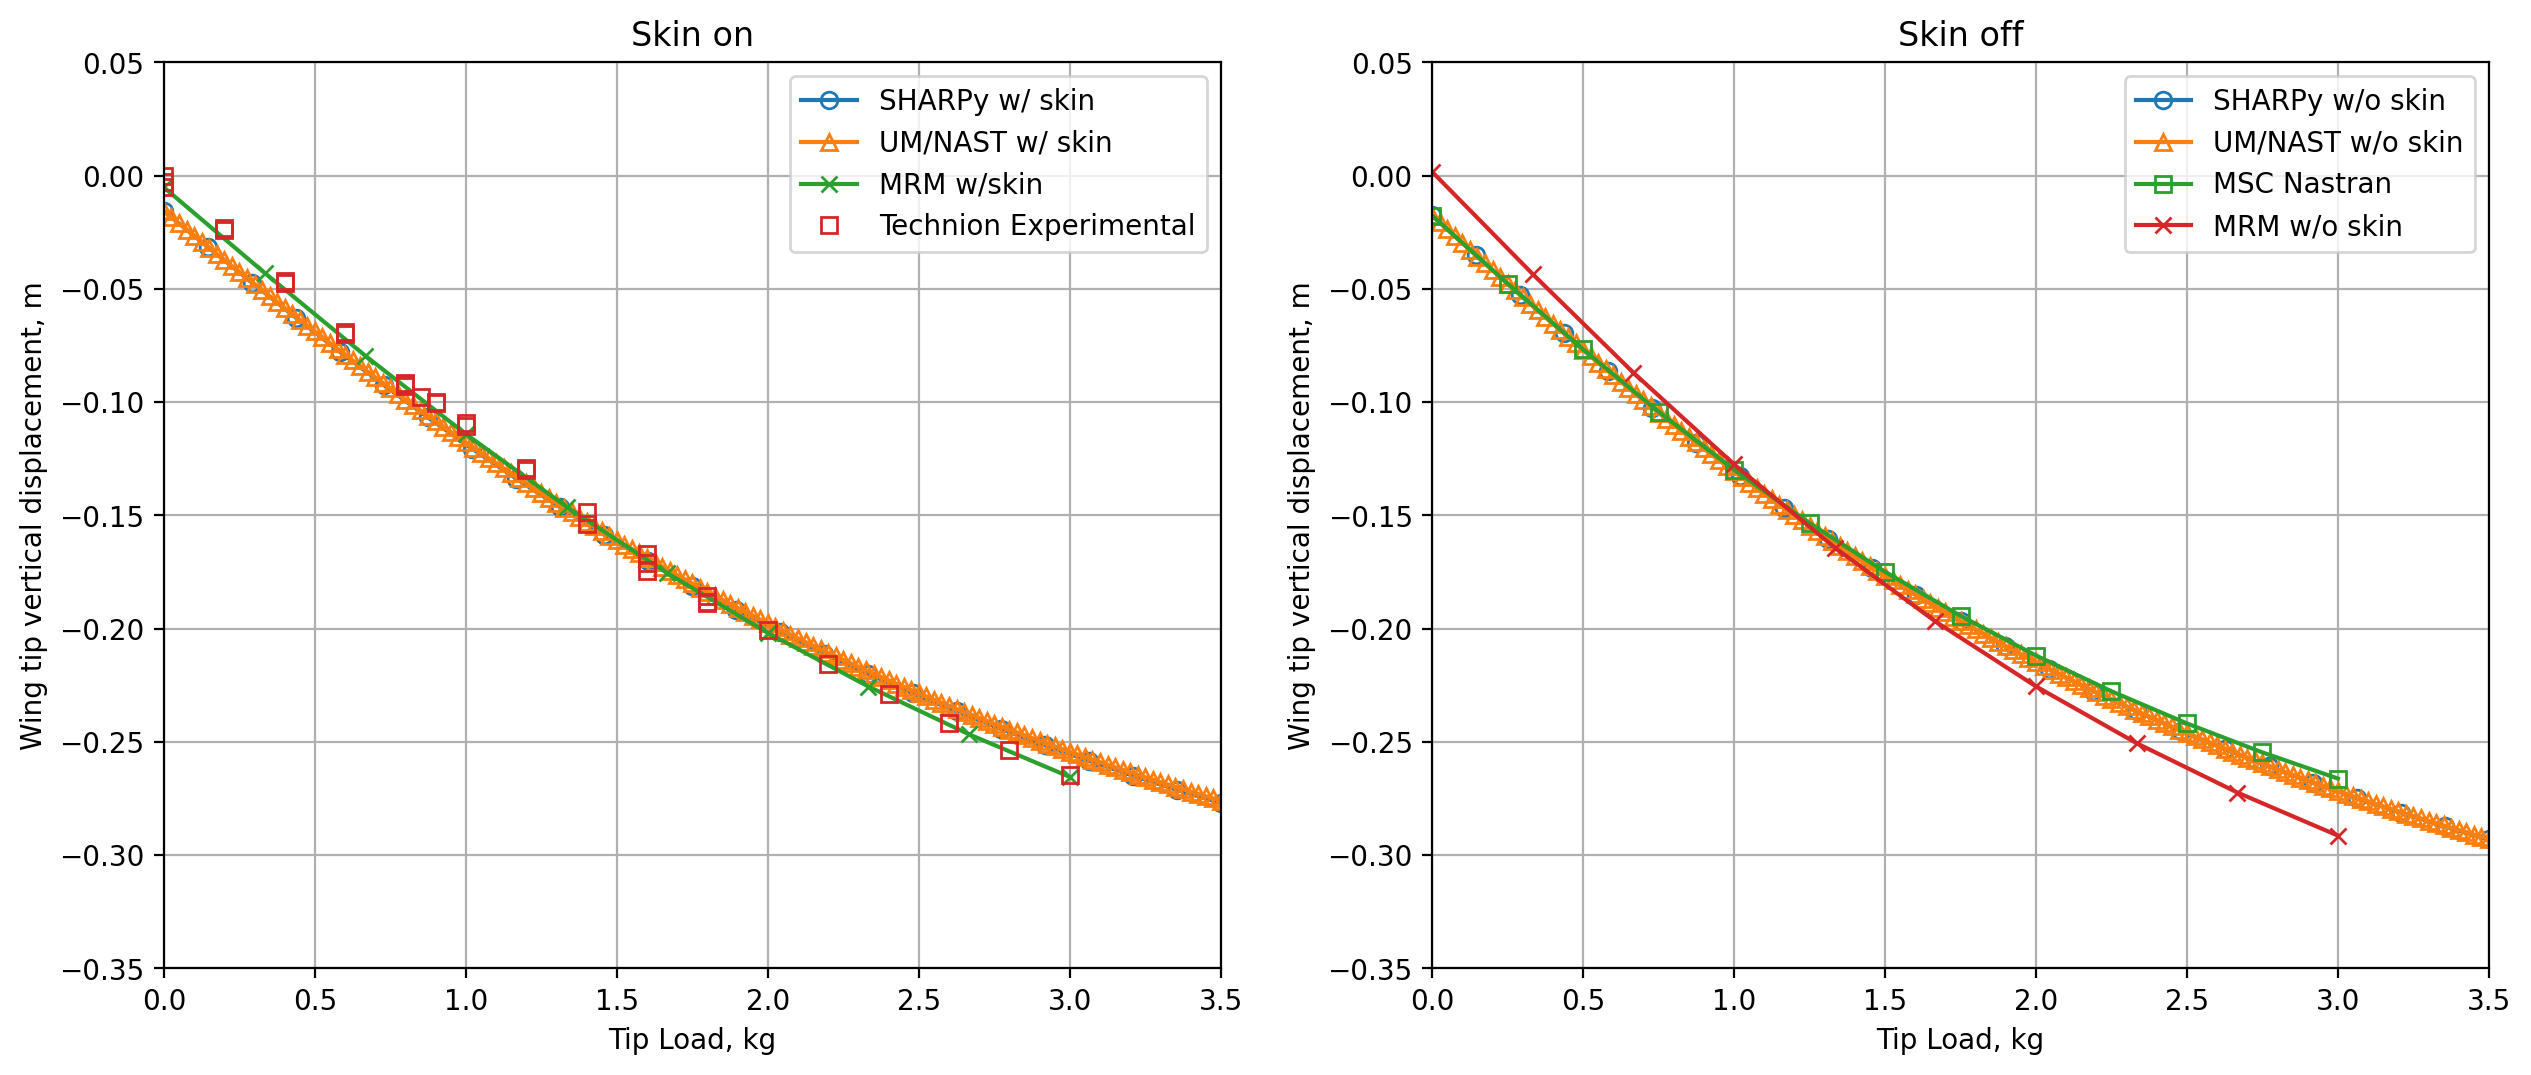

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

for case in torsion_results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 1], label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))

for a in ax:
    a.legend()
    a.set_xlim(0, 3.5)
    a.set_ylim(-0.35, 0.05)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('Wing tip vertical displacement, m')
    a.grid()

ax[0].set_title('Skin on')
ax[1].set_title('Skin off');

## Twist Angle

The twist angle at the wing tip node is shown below. 
  
The twist angle has been computed using:

$$\theta = \arctan\left(\frac{z_{LE}^G - z_{TE}^G}{x_{LE}^G - x_{TE}^G}\right)$$

where the coordinates are expressed in an inertial frame of referece with $x^G$ parallel with the root chord positive downstream, $y^G$ along the beam and $z^G$ completing the cross-product (i.e. upwards).

In addition, UM/NAST Method 2 is provided and uses a projection of the three unit vectors at the wingtip in deformed configuration onto the unit vectors in undeformed configurations to define a rotation matrix, which is then converted to rotation axis representation.
  
Note: 
  * For the `skin off` case, the initial offset present in the MRM data set has been removed to ease the comparison.

In [5]:
torsion_results['technion_mrm_wo_skin']['data'][:, 2] -= torsion_results['technion_mrm_wo_skin']['data'][0, 2]

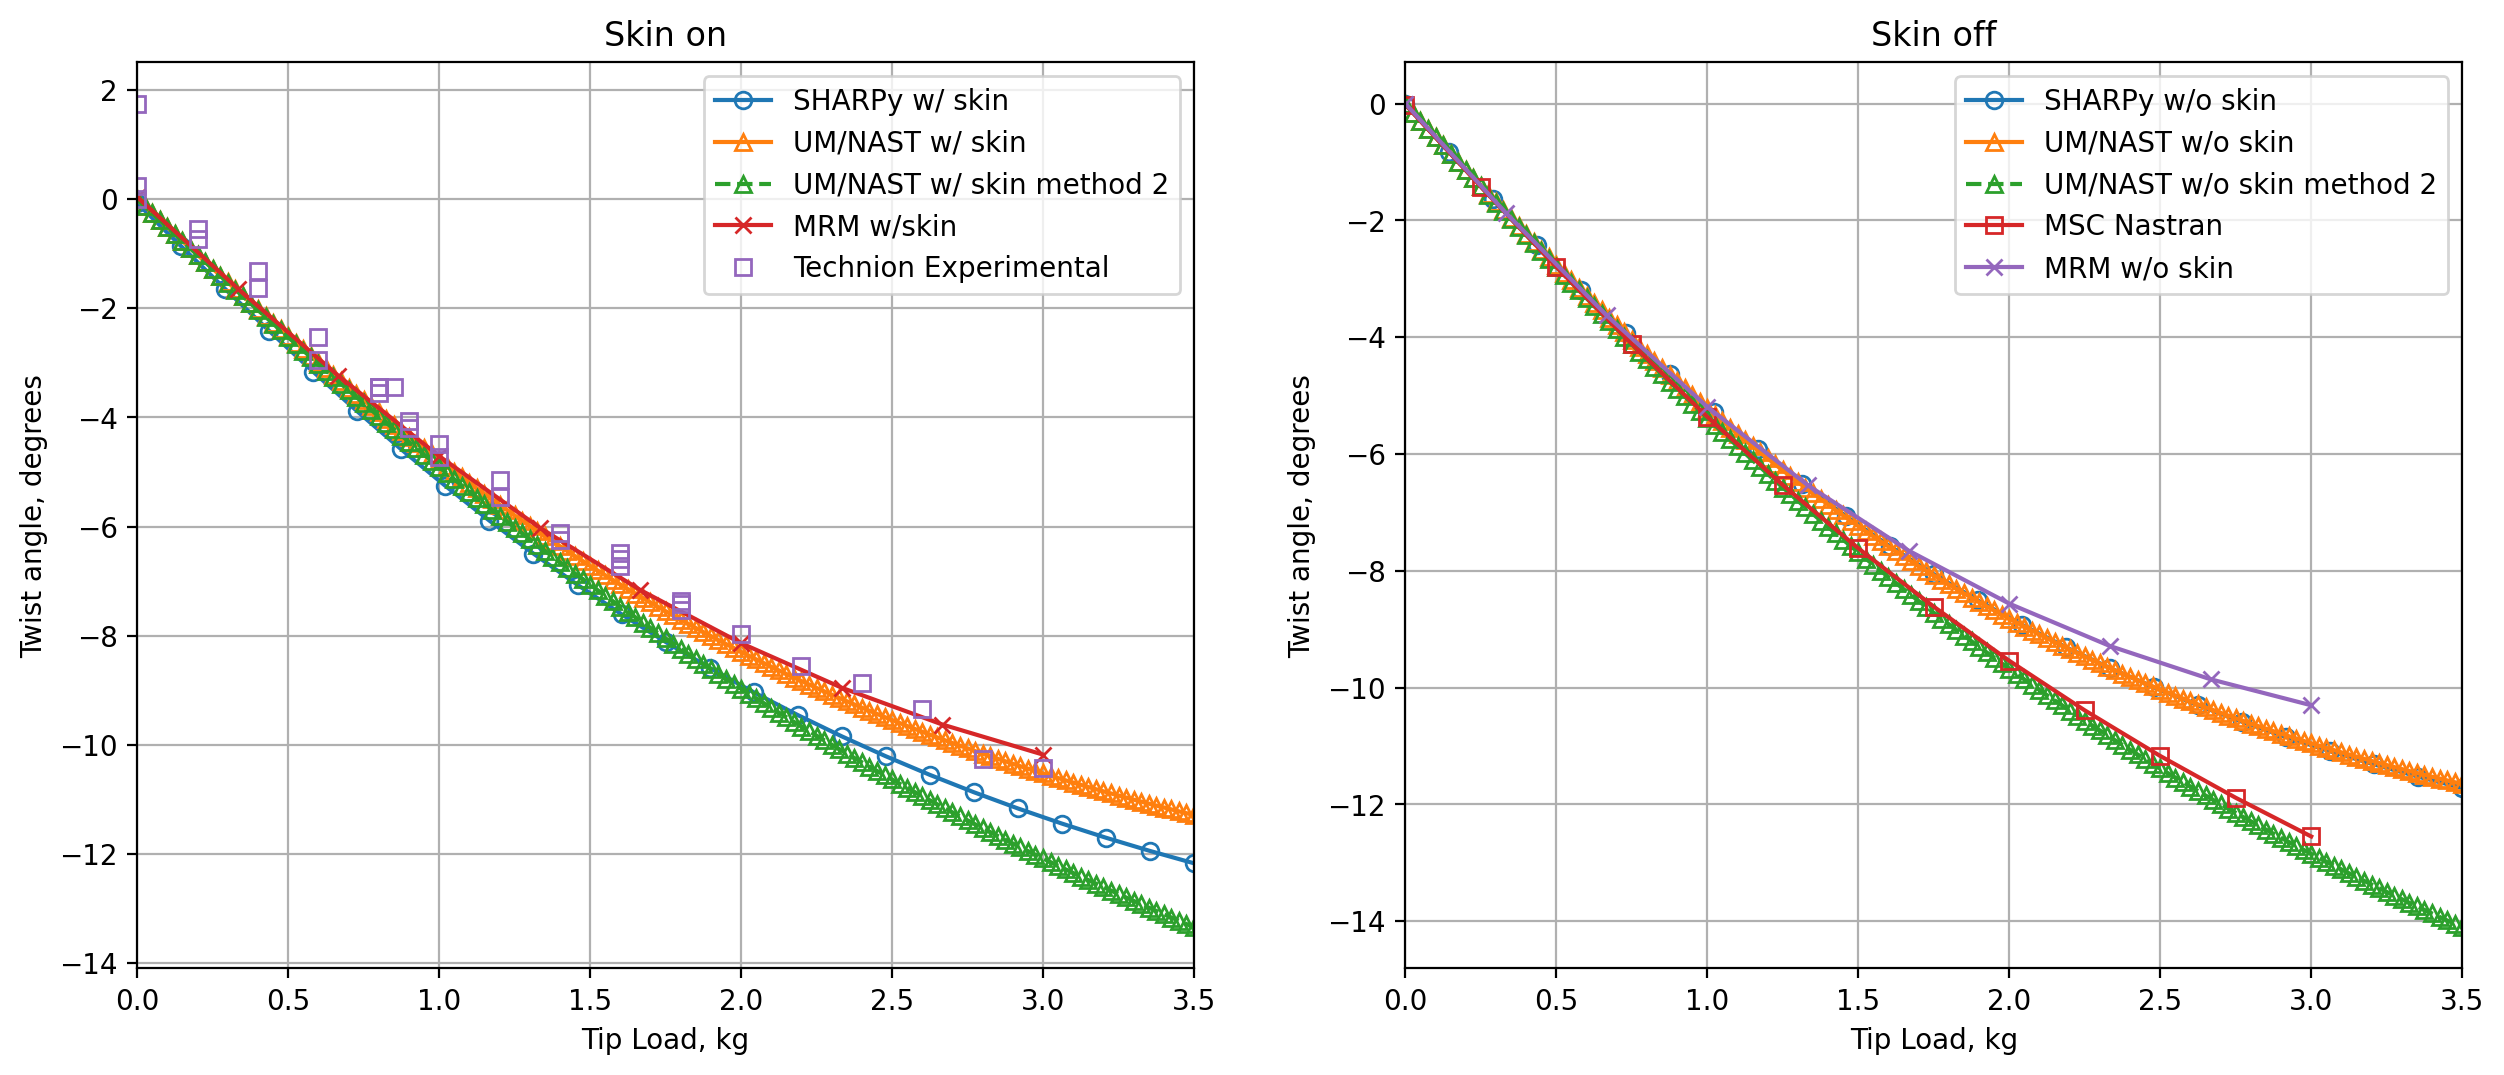

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

for key, case in torsion_results.items():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 2], label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))
    if 'um' in key:    
        a.plot(case['data'][:, 0], case['data'][:, 3], label=case['label'] + ' method 2', marker=case['marker'], ms=case['ms'], mfc='none', ls='--')

for a in ax:
    a.legend()
    a.set_xlim(0, 3.5)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('Twist angle, degrees')
    a.grid()

ax[0].set_title('Skin on')
ax[1].set_title('Skin off');

# Twist metric

Given that the twist angle can be measured in a variety of different ways, to aid the comparison we propose an alterantive metric. This consists in evaluating the difference between the leading edge and trailing edges vertical displacements in the inertial frame, thus removing any issues in computing sines, cosines etc.


In [7]:
torsion_coordinates = {}
torsion_coordinates['sharpy_w_skin'] = {'file': './torsion_SHARPy_w_skin_wingtip_coordinates.txt',
                                       'skin': True,
                                       'marker': 'o',
                                       'ms': 6,
                                       'label': 'SHARPy w/ skin'}

torsion_coordinates['sharpy_wo_skin'] = {'file': './torsion_SHARPy_wo_skin_wingtip_coordinates.txt',
                                       'skin': False,
                                       'marker': 'o',
                                       'ms': 6,
                                       'label': 'SHARPy w/o skin'}

for key, case in torsion_coordinates.items():
    case['data'] = {}
    data = np.loadtxt(case['file'])
    case['data']['load'] = data[:, 0]
    case['data']['mid'] = data[:, 1:4]
    case['data']['le'] = data[:, 4:7]
    case['data']['te'] = data[:, 7:10]

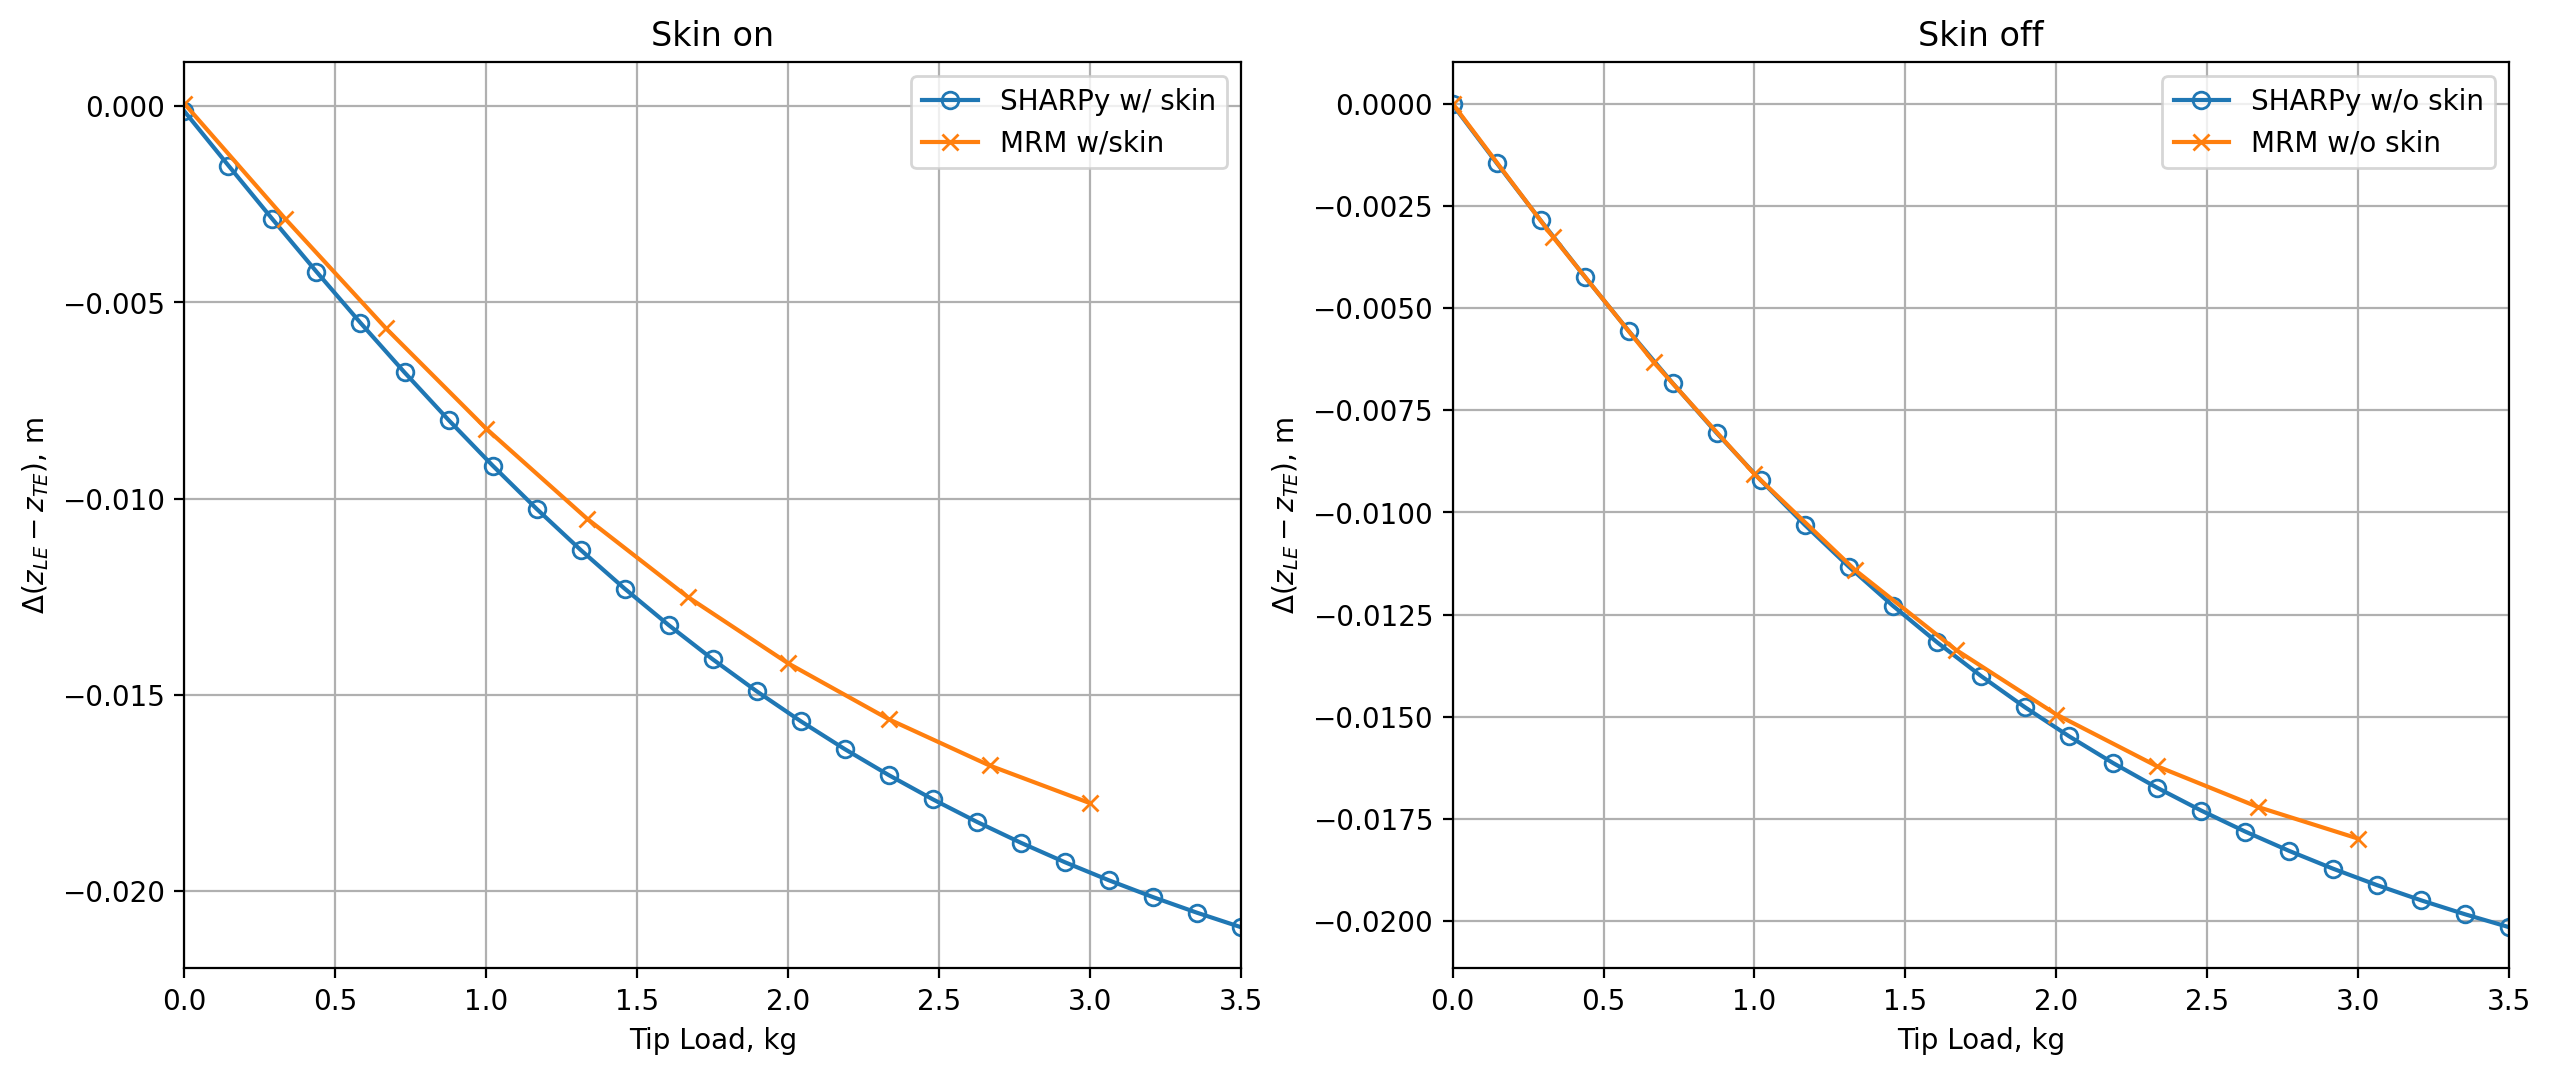

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

for case in torsion_coordinates.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data']['load'], (case['data']['le'][:, 2] - case['data']['te'][:, 2]), label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))


# Technion coordinates:  mid_chord_displacement +- 0.05 * twist_angle 
case = torsion_results['technion_mrm_w_skin']
ax[0].plot(case['data'][:, 0], 2 * case['data'][:, 2] * np.pi/180 * 0.05,
           label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))
case = torsion_results['technion_mrm_wo_skin']
ax[1].plot(case['data'][:, 0], 2 * case['data'][:, 2] * np.pi/180 * 0.05,
           label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))
for a in ax:
    a.legend()
    a.set_xlim(0, 3.5)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('$\Delta(z_{LE} - z_{TE})$, m')
    a.grid()

ax[0].set_title('Skin on')
ax[1].set_title('Skin off');